# Zadanie
Wygenerujmy $100$ elementową próbkę z rozkładu normalnego ze średnią $7$ i odchyleniem standardowym $3$. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
np.random.seed(12345)
data = stats.norm(7,3).rvs(100)
n=data.size

## Średnia z próbki jest bliska ale różna od rzeczywistej średniej.

In [5]:
meanVal = np.mean(data)
n=data.size
stdVal = np.std(data, ddof=1)
print('Real mean: {0:5.3f}; Sample mean: {1:5.3f}'.format(7, meanVal))
print('Real SD: {0:5.3f}; Sample SD: {1:5.3f}'.format(3, stdVal))

Real mean: 7.000; Sample mean: 7.101
Real SD: 3.000; Sample SD: 3.121


Zapomnijmy, o tym, że wiemy z jakiego rozkładu pochodzi próbka i wykonajmy <tt>one sample t-test</tt> dwoma sposobami.

In [6]:
checkVal=7

## Wyliczmy wartość statystyki
$$
t=\frac{\bar X - \mu_0}{S} \sqrt{n-1}
$$
lub równoważnie 
$$
t=\frac{\bar X - \mu_0}{SE(x)} 
$$


In [7]:
tVal_1 = (checkVal-meanVal) / stats.sem(data)
print('tVal_1 for {0}: {1:5.8f}'.format(checkVal, tVal_1))
tVal_2 = (checkVal-meanVal)/np.std(data, ddof=0)*np.sqrt(n-1)
print('tVal_2 for {0}: {1:5.8f}'.format(checkVal, tVal_2))

tVal_1 for 7: -0.32312231
tVal_2 for 7: -0.32312231


## Wyznaczmy p-value

In [8]:
X=stats.t(n-1)
p = X.sf(-tVal_2)+X.cdf(tVal_2)
print('t-statistic={0:1.8f}, p={1:6.4f}'.format(float(tVal_1), p))

t-statistic=-0.32312231, p=0.7473


Wykonajmy analogiczny test za pomoca funkcji <tt>ttest_1samp</tt>

In [9]:
# Compare this with the output of the t-test
(tstatistic, pVal) = stats.ttest_1samp(data, checkVal)
print('t-statistic={0:1.8f}, p={1:6.4f}'.format(float(tstatistic), pVal))

t-statistic=0.32312231, p=0.7473


Narysuj gęstość rozkłądu normalnego. Zaznacz prawdziwą średnią i średią z próbki. Na odzielnym rysunku narysuj gęstość roakładu t-studentsa i zazncza obszar, który wyznacza p-wartość. 

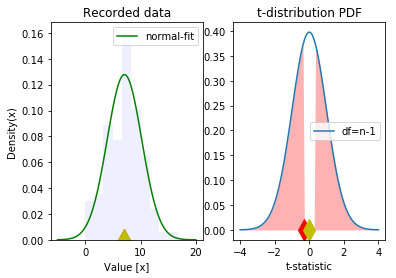

In [10]:
tVal=tVal_1
# Prepare the plot
fig, axs = plt.subplots(1,2)
# Left plot ------------------------------------
# Plot the histogram of the data, superposed with the normal fit
xval = np.linspace(-5,20, 100)
yval = stats.norm(meanVal,stdVal).pdf(xval)

axs[0].hist(data, normed=True, color='#eeefff')
axs[0].plot(xval, yval, 'g', label='normal-fit')
axs[0].set_title('Recorded data')
axs[0].legend()
#Mark the mean value, as well as the value of interest 
axs[0].plot(checkVal, 0, marker='d', color='r', ms=15)
axs[0].plot(meanVal, 0, marker='d', color='y', ms=15)
axs[0].set_xlabel('Value [x]')
axs[0].set_ylabel('Density(x)')

# Right plot ------------------------------------
# The corrsponding t-distribution
xv2 = np.linspace(-4,4, 100)
yv2 = stats.t(len(data)-1).pdf(xv2)
tFill = yv2.copy()
tFill[(xv2>-tstatistic) & (xv2<tstatistic)] = 0
axs[1].plot(xv2, yv2, label='df=n-1')
axs[1].fill_between(xv2, tFill, color='r', alpha=0.3, lw=0)
axs[1].plot(tVal, 0, 'rd', ms=15)
axs[1].plot(0, 0, 'yd', ms=15)
axs[1].set_xlabel('t-statistic')
axs[1].set_title('t-distribution PDF')
axs[1].legend()
plt.show()

# Zadanie
Zweryfikuj hipotezę:

$H_0$: $\mu=7$ przy hipotezie alternatywnej $H_1$: $\mu <7$

### Możemy to zrobić ręcznie

In [11]:
t = (checkVal-meanVal) / stats.sem(data)
alpha=0.05
L=-np.infty
R=-X.ppf(1-alpha)
print(r'( %3.3f , %3.3f)' % (L,R))

( -inf , -1.660)


In [12]:
if t < R:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


In [13]:
p = X.cdf(t)
print(p)

0.373642059144


In [14]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


In [15]:
print('t-statistic={0:1.8f}, p={1:6.4f}'.format(float(t), p))

t-statistic=-0.32312231, p=0.3736


### Wykonaj zadanie za pomocą <tt>ttest_1samp</tt>

In [17]:
# Compare this with the output of the t-test
(tstatistic, pVal) = stats.ttest_1samp(data, checkVal)
print('t-statistic={0:1.8f}, p={1:6.4f}'.format(float(tstatistic), pVal/2))

t-statistic=0.32312231, p=0.3736
